In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# If the dataset is in your notebook folder:
data = pd.read_csv("bank.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[col])
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [5]:
X = data.drop("y", axis=1)
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [6]:
model = DecisionTreeClassifier(
    max_depth=6,
    criterion="gini",
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [7]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.55      0.34      0.42       125

    accuracy                           0.90      1131
   macro avg       0.74      0.65      0.68      1131
weighted avg       0.88      0.90      0.89      1131



In [8]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance

,Feature,Importance
11,duration,0.452855
13,pdays,0.153210
15,poutcome,0.083809
0,age,0.081121
5,balance,0.067228
10,month,0.060357
9,day,0.021737
3,education,0.017615
6,housing,0.015257
1,job,0.014392


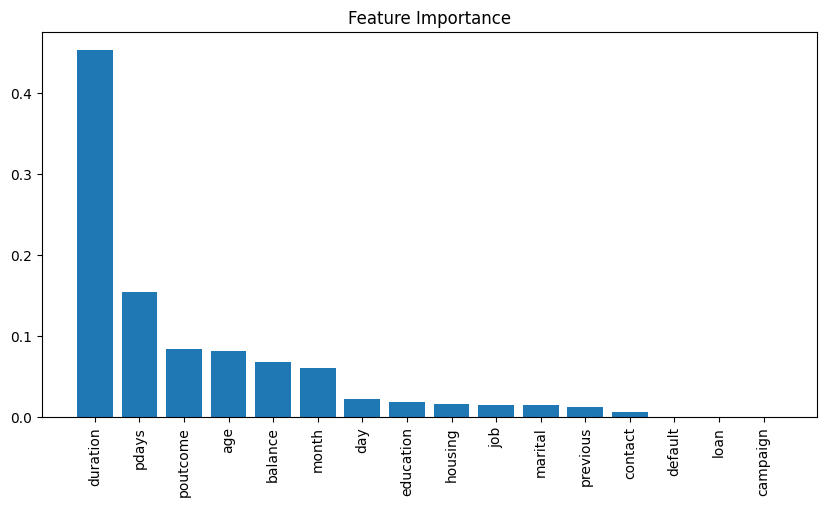

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(importance["Feature"], importance["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()
